In [2]:
#원본 소스코드
#https://github.com/kairess/corona-virus-prediction/blob/master/corona19_confirmed_prediction.ipynb

import pandas as pd
import plotly.graph_objs as go #라벨도 보여주는 interactive한 그래프
import plotly.offline as py
from fbprophet import Prophet #페이스북에서 만든 시계열예측 위한 패키지.
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv


In [4]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')
#df.head()

df_korea = df[df['Country/Region'] == 'South Korea']
df_korea.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
33,NaN,South Korea,37.5665,126.978,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104


In [5]:
df_korea = df_korea.T[4:] #5번째부터 날짜별 확진자 수 있음.

df_korea = df_korea.reset_index().rename(columns={'index': 'date', 33: 'confirmed'})#기존 index 삭제하고 rename

df_korea['date']=pd.to_datetime(df_korea['date'])#pandas에서 쓰는 날짜 양식으로 변환.

df_korea.head()

,date,confirmed
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [6]:
df_korea = df_korea.append([
  {'date': pd.to_datetime('2020-02-22'), 'confirmed': 433}, #22일 누적 확진자 수
  {'date': pd.to_datetime('2020-02-23'), 'confirmed': 602},
  {'date': pd.to_datetime('2020-02-24'), 'confirmed': 833},
  {'date': pd.to_datetime('2020-02-25'), 'confirmed': 977},
  {'date': pd.to_datetime('2020-02-26'), 'confirmed': 1261},
  {'date': pd.to_datetime('2020-02-27'), 'confirmed': 1595},
  {'date': pd.to_datetime('2020-02-28'), 'confirmed': 2022},
  {'date': pd.to_datetime('2020-02-29'), 'confirmed': 2931},
  {'date': pd.to_datetime('2020-03-01'), 'confirmed': 3526},
  {'date': pd.to_datetime('2020-03-02'), 'confirmed': 4212},
  {'date': pd.to_datetime('2020-03-03'), 'confirmed': 4812},
  {'date': pd.to_datetime('2020-03-04'), 'confirmed': 5328}
], ignore_index=True)
#자료출처 : https://terms.naver.com/entry.nhn?docId=5912275&cid=43667&categoryId=43667#TABLE_OF_CONTENT5
df_korea.tail()

,date,confirmed
37,2020-02-29,2931
38,2020-03-01,3526
39,2020-03-02,4212
40,2020-03-03,4812
41,2020-03-04,5328


In [7]:
##Plot
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_korea.date, #x축에 날짜
        y = df_korea.confirmed, #y축에 누적 확진자 수
        name = 'Confirmed in Korea'
    )
)

In [8]:
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'confirmed':'y'
})

df_prophet.head()
df_prophet.tail()

,ds,y
37,2020-02-29,2931
38,2020-03-01,3526
39,2020-03-02,4212
40,2020-03-03,4812
41,2020-03-04,5328


In [0]:
#Create a Model
m = Prophet(
    changepoint_prior_scale=0.2, #increasing it will make the trend more flexible
    #값이 커질수록 모델을 유연하게 만듦
    changepoint_range = 0.98, #place potential changepoints in the first 98% of the time series
    #데이터 앞쪽 몇 퍼센트 부분안에서 변화점(변곡점)을 만들것인지 설정.
    #changepoint에 관한 문서 : https://facebook.github.io/prophet/docs/trend_changepoints.html
    yearly_seasonality = False, #연별 트렌드분석 x
    weekly_seasonality=False, #주별 트렌드분석 x
    daily_seasonality=True, #데일리 트렌드 분석 o
    seasonality_mode='additive' #계절 변동의 영향이 트렌드에 더해지는 형태.
                          # 곱해지는 형태일 때는 multiplicative
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=10) #예측할 기간동안의 데이터 저장 공간을 미리 확보.

future.tail(10)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,ds
42,2020-03-05
43,2020-03-06
44,2020-03-07
45,2020-03-08
46,2020-03-09
47,2020-03-10
48,2020-03-11
49,2020-03-12
50,2020-03-13
51,2020-03-14


In [1]:
#Predict
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10) #ds:날짜, yhat:예측값, lower:오차를 고려한 예측 최소값, upper:오차 고려 예측 최대값


NameError: ignored

In [0]:
#Plot Prediction
fig = plot_plotly(m, forecast)
py.iplot(fig)

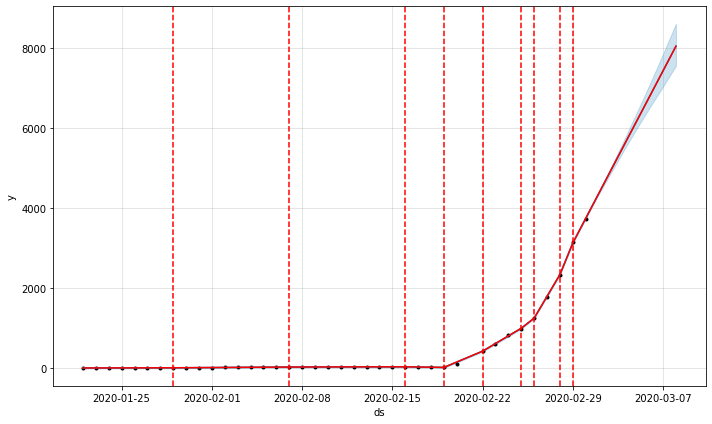

In [0]:
#Plot changepoints
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)